In [1]:
import pandas as pd 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("D:/Top_mentor/Nov/5th_nov/KNN_Project_5&6/KNN Assignment/iphone_purchase_records.csv")

In [3]:
df1=data.copy()

In [4]:
df1.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [5]:
print('No. of rows', df1.shape[0])

No. of rows 400


In [6]:
print('No. of columns', df1.shape[1])

No. of columns 4


In [7]:
df1.columns

Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')

# Total number of Male and Female 

In [8]:
gen=df1['Gender'].value_counts()
print('Gender distribution',gen)

Gender distribution Female    204
Male      196
Name: Gender, dtype: int64


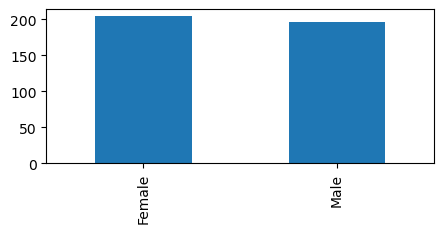

In [80]:
plt.figure(figsize=(5,2))
df1['Gender'].value_counts().plot(kind='bar')
plt.show()

# Total number of male have iphone

In [10]:
male_i = len(df1[(df1['Gender']=='Male')&(df1['Purchase Iphone']==1)])
print('Total number of male have iphone', male_i)

Total number of male have iphone 66


# Total number of female have iphone

In [11]:
female_i = len(df1[(df1['Gender']=='Female')&(df1['Purchase Iphone']==1)])
print('Total number of male have iphone', female_i)

Total number of male have iphone 77


# Total number of male belongs age (15 - 40) have iphone

In [12]:
len(df1[(df1['Age'].between(15,40)) & (df1['Gender']=='Male')&(df1['Purchase Iphone']==1)])

21

# Total number of female belongs age (15 - 40) have iphone

In [13]:
len(df1[(df1['Age'].between(15,40)) & (df1['Gender']=='Female')&(df1['Purchase Iphone']==1)])

18

# Maimum salary range by gender, who have iphone

In [14]:
df1.groupby(['Salary'])[['Gender','Purchase Iphone']].max().sort_values(by='Salary',ascending=False).head()

,Gender,Purchase Iphone
Salary,,
150000,Male,1
149000,Male,1
148000,Male,1
147000,Female,1
146000,Female,1


# Total no male have iphone salary range (20000-50000)

In [31]:
m = sum((df1['Gender']== 'Male') & (df1['Salary'].between(20000,50000)))
print('Total no male have iphone salary range (20000-50000)',m)

Total no male have iphone salary range (20000-50000) 47


# Total no female have iphone salary range (20000-50000)

In [33]:
f = sum((df1['Gender']== 'Female') & (df1['Salary'].between(20000,50000)))
print('Total no male have iphone salary range (20000-50000)',f)

Total no male have iphone salary range (20000-50000) 62


# Mimmum salary by gender

In [35]:
df1.groupby('Gender')['Salary'].min()

Gender
Female    15000
Male      15000
Name: Salary, dtype: int64

# Age and salary distribution by gender

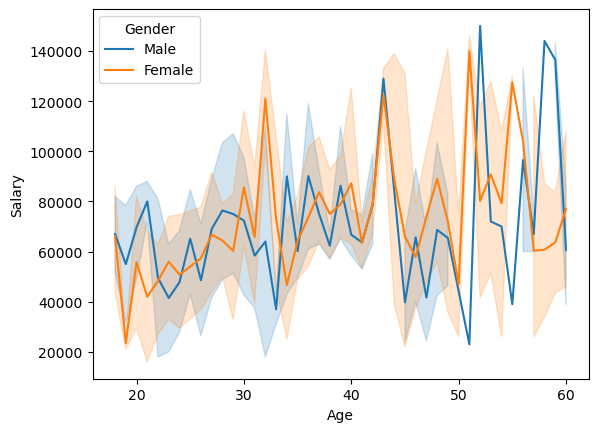

In [84]:
sns.lineplot(x='Age', y='Salary', hue='Gender', data=df1)
plt.show()

# iphone holder analysis by age and gender

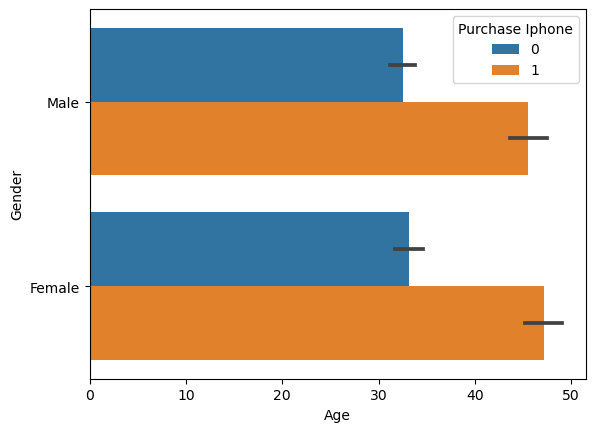

In [77]:
sns.barplot(x='Age', y='Gender', hue='Purchase Iphone',data=df1)
plt.show()

# Total number of iphone holders

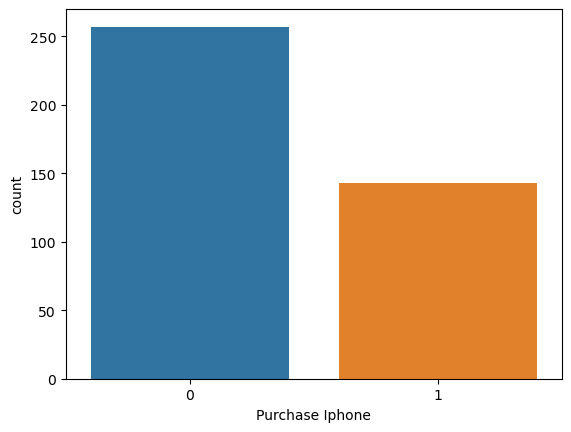

In [76]:
sns.countplot(x='Purchase Iphone',data=df1)
plt.show()

# Average salary by gender 

In [203]:
round(df1.groupby('Gender')['Salary'].mean())

Gender
Female    71760.0
Male      67643.0
Name: Salary, dtype: float64

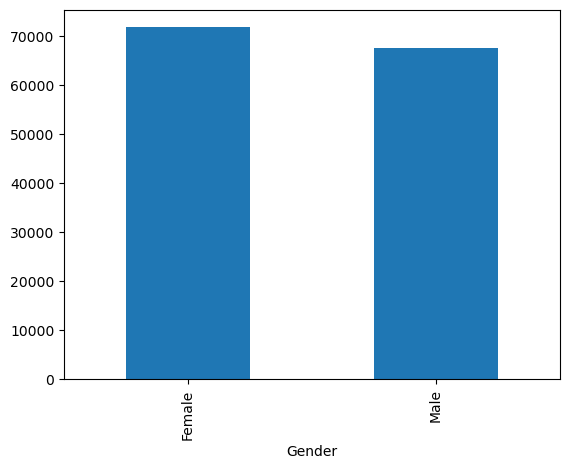

In [75]:
df1.groupby('Gender')['Salary'].mean().plot(kind='bar')
plt.show()

# Don't have iphone oriented with age group 25 to 40

In [100]:
null_i=len(df1[(df1['Age'].between(25,40))&(df1['Purchase Iphone']==0)])
print("Don't have iphone oriented with age group 25 to 40", null_i)

Don't have iphone oriented with age group 25 to 40 171


# Correlation 

In [105]:
df1.corr()

C:\Users\Acer\AppData\Local\Temp\ipykernel_13048\473017434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,Age,Salary,Purchase Iphone
Age,1.000000,0.155238,0.622454
Salary,0.155238,1.000000,0.362083
Purchase Iphone,0.622454,0.362083,1.000000


In [114]:
df1.isnull().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

# KNN Model

In [115]:
dummy = pd.get_dummies(df1['Gender']).astype('int')
dummy

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


In [116]:
df2 = pd.concat([df1,dummy], axis=1)

In [117]:
df2.head()

,Gender,Age,Salary,Purchase Iphone,Female,Male
0,Male,19,19000,0,0,1
1,Male,35,20000,0,0,1
2,Female,26,43000,0,1,0
3,Female,27,57000,0,1,0
4,Male,19,76000,0,0,1


In [143]:
X= df2[['Female','Male','Age','Salary']]


In [145]:
y=df2['Purchase Iphone']


In [146]:
from sklearn.model_selection import train_test_split

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8)

In [148]:
from sklearn.neighbors import KNeighborsClassifier

# Identifiaction of K 

In [152]:
from math import sqrt
sqrt(df2.shape[0])

20.0

In [190]:
clf= KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [191]:
pred = clf.predict(X_test)
pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

# Check the accuracy of the model

In [192]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [193]:
print('Accuracy level = ',accuracy_score(y_test,pred)*100)

Accuracy level =  82.5


In [194]:
confusion_matrix(y_test, pred)

array([[48, 11],
       [ 3, 18]], dtype=int64)

<Axes: >

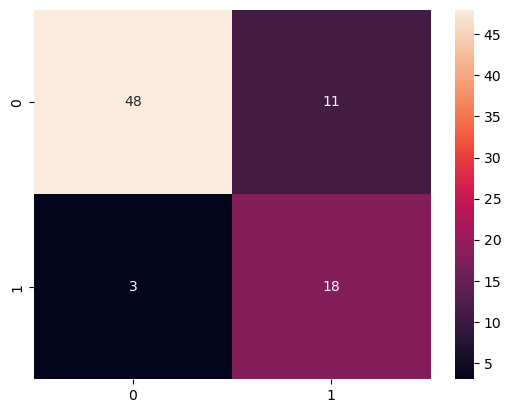

In [195]:
sns.heatmap(confusion_matrix(y_test, pred), annot =True)

In [196]:
error = []

In [197]:
for i in range(1,20):
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    predict_i = clf.predict(X_test)
    error.append (1-accuracy_score(y_test,predict_i))

In [185]:
error

[0.17500000000000004,
 0.16249999999999998,
 0.1875,
 0.21250000000000002,
 0.1875,
 0.22499999999999998,
 0.21250000000000002,
 0.21250000000000002,
 0.21250000000000002,
 0.21250000000000002,
 0.19999999999999996,
 0.21250000000000002,
 0.19999999999999996,
 0.23750000000000004,
 0.23750000000000004,
 0.23750000000000004,
 0.22499999999999998,
 0.22499999999999998,
 0.21250000000000002,
 0.21250000000000002,
 0.22499999999999998,
 0.22499999999999998,
 0.22499999999999998,
 0.22499999999999998,
 0.17500000000000004,
 0.16249999999999998,
 0.1875,
 0.21250000000000002,
 0.1875,
 0.22499999999999998,
 0.21250000000000002,
 0.21250000000000002,
 0.21250000000000002,
 0.21250000000000002,
 0.19999999999999996,
 0.21250000000000002,
 0.19999999999999996,
 0.23750000000000004,
 0.23750000000000004,
 0.23750000000000004,
 0.22499999999999998,
 0.22499999999999998,
 0.21250000000000002]